In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the function f(x1, x2)
objective_function = lambda x: (x[0]**2 + x[1] - 11)**2 + (x[1]**2 + x[0] - 7)**2

# x1 = x[0]; x2 = x[1]
# Compute the gradient of the function
gradient_function = lambda x: np.array([4 * x[0] * (x[0]**2 + x[1] - 11) + 2 * (x[1]**2 + x[0] - 7), 2 * (x[0]**2 + x[1] - 11) + 4 * x[1] * (x[1]**2 + x[0] - 7)])

In [3]:
# Line search function
def line_search(objective_function, gradient, x):
    beta = 0.1
    stepsize = 1
    trial = 100
    tau = 0.5
    for _ in range(trial):
        fx1 = objective_function(x)
        fx2 = objective_function(x - stepsize * gradient)
        c = -beta * stepsize * np.dot(gradient, gradient)
        if fx2 - fx1 <= c:
            break
        else:
            stepsize *= tau
    return stepsize

In [4]:
# Steepest Descent Method
maxit = 10000
epsilon = 0.001

x_store = np.zeros((2, maxit))
x = np.array([0, 0])
    
for i in range(maxit):
    x_store[0, i] = x[0]
    x_store[1, i] = x[1]
    gradient = gradient_function(x)
    b = np.linalg.norm(gradient)
    if b < epsilon:
        break
        
    stepsize = line_search(objective_function, gradient, x)
    x = x - stepsize * gradient

In [5]:
print("Optimum stepsize:", stepsize)

# Output results
print("Minimum value:", objective_function(x))
print("Minimum location:", x)

# First iteration when i = 0
print("Iteration:", i + 1)

Optimum stepsize: 0.015625
Minimum value: 7.368947568261478e-09
Minimum location: [2.99999944 1.99997953]
Iteration: 16


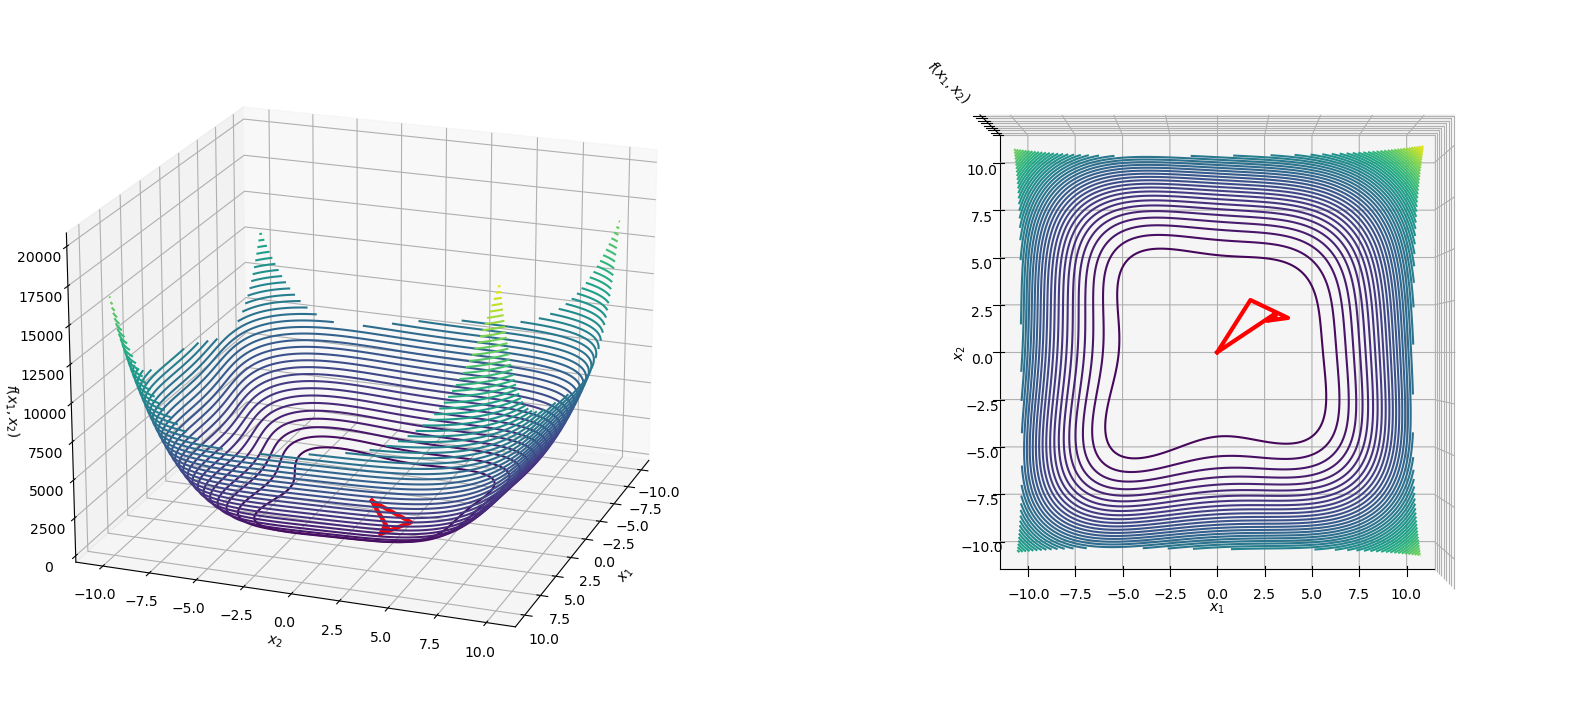

In [6]:
# Define grid for plotting
X1, X2 = np.meshgrid(np.linspace(-10, 10, 400), np.linspace(-10, 10, 400))
Z = objective_function(np.array([X1, X2]))

# Plotting
fig = plt.figure(figsize=(20, 10))

# First subplot (3D surface plot)
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.contour3D(X1, X2, Z, 60, cmap='viridis')
ax.plot(x_store[0, :], x_store[1, :], objective_function(x_store), color='red', linewidth=3)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
ax.view_init(20, 20)

# Second subplot (Contour plot)
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.contour3D(X1, X2, Z, 60, cmap='viridis')
ax.plot(x_store[0, :], x_store[1, :], color='red', linewidth=3)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
ax.axes.zaxis.set_ticklabels([])
ax.view_init(90, -90);

plt.show()